## Basic Graph

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


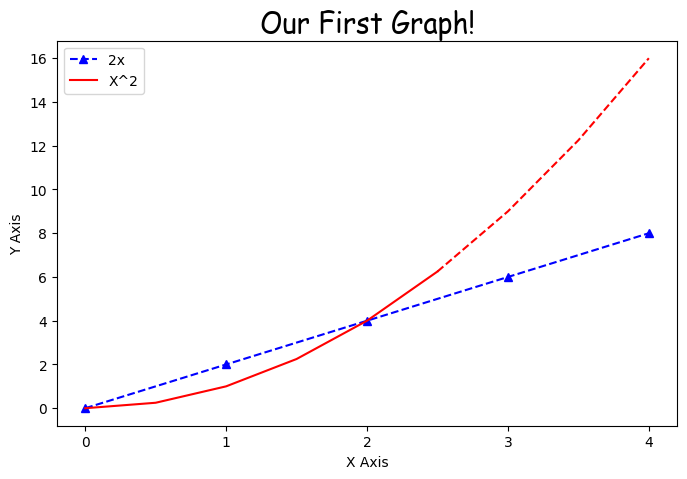

In [4]:
x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 6, 8]
# Create a new figure with size 8x5 inches and 100 DPI resolution
plt.figure(figsize=(8, 5), dpi=100)
# Plot Line 1: Blue dashed line with triangle markers
plt.plot(x, y, 'b^--', label='2x')
# Line 2 data using numpy for finer intervals
x2 = np.arange(0, 4.5, 0.5)
# Plot the first part of Line 2 as a solid red line (x^2)
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')
# Plot the remaining part of Line 2 as a dashed red line (continuation)
plt.plot(x2[5:], x2[5:]**2, 'r--')
# Set plot title with custom font and size
plt.title('Our First Graph!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
# Set axis labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
# Customize x-axis ticks
plt.xticks([0, 1, 2, 3, 4])
# Add legend to show line labels
plt.legend()
# Display the plot


## Bar Graph

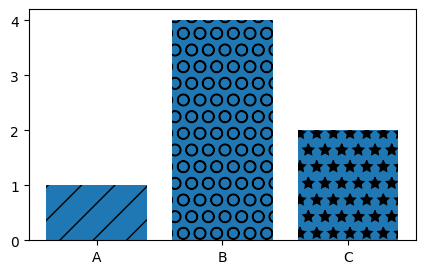

In [5]:
# Define labels for each bar in the bar chart
labels = ['A', 'B', 'C']
# Define values for each corresponding label
values = [1, 4, 2]
# Create a figure of size 5x3 inches with 100 DPI resolution
plt.figure(figsize=(5, 3), dpi=100)
# Create the bar chart and store the bars (rectangles) in the 'bars' variable
bars = plt.bar(labels, values)
# Define different fill patterns (hatches) for each bar
patterns = ['/', 'O', '*']  # '/' = diagonal lines, 'O' = circles, '*' = stars
# Apply hatch patterns to each bar using a loop
for bar in bars:
    bar.set_hatch(patterns.pop(0))  # Apply one pattern at a time and remove it from the list
# Display the chart window
plt.show()

## Line Graph

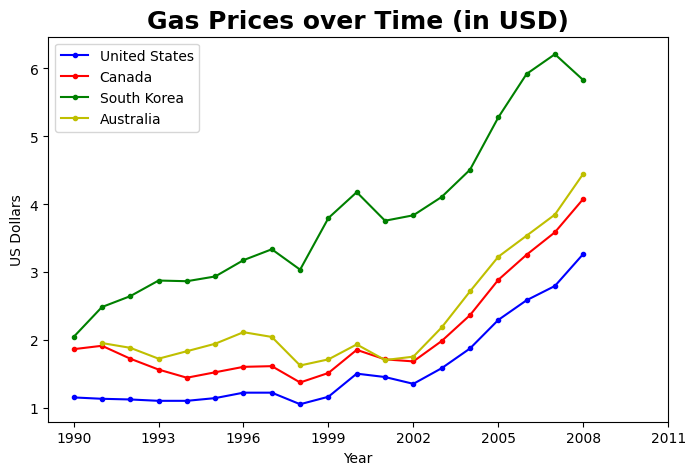

In [6]:
# Load the gas prices dataset from a CSV file
gas = pd.read_csv('gas_prices.csv')  # Make sure 'gas_prices.csv' is in the same folder as your script
# Create a figure with custom size (8x5 inches)
plt.figure(figsize=(8, 5))
# Set the title of the plot with bold font and size 18
plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})
# Plot gas prices for different countries with line style and dot markers
plt.plot(gas.Year, gas.USA, 'b.-', label='United States')     # Blue line with dot markers
plt.plot(gas.Year, gas.Canada, 'r.-', label='Canada')         # Red line
plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')  # Green line
plt.plot(gas.Year, gas.Australia, 'y.-', label='Australia')   # Yellow line
# Alternative way to loop through and plot selected countries
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')
# Set custom X-axis ticks: show every 3rd year and also include 2011
plt.xticks(gas.Year[::3].tolist() + [2011])
# Label the X and Y axes
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()
plt.show()


## Histogram

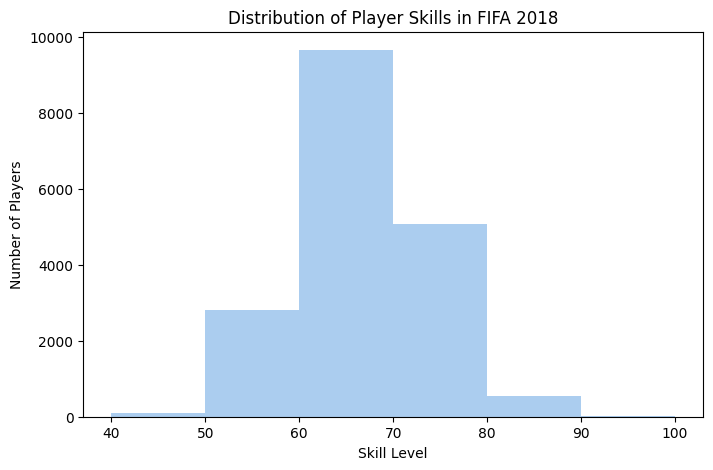

In [7]:
# Load the dataset
fifa = pd.read_csv('fifa_data.csv')
# Create histogram bins
bins = [40, 50, 60, 70, 80, 90, 100]
# Create the figure
plt.figure(figsize=(8, 5))
# Plot histogram
plt.hist(fifa['Overall'], bins=bins, color='#abcdef')
# Customize plot
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')
# Show the plot
plt.show()


## Pie-Chart 01

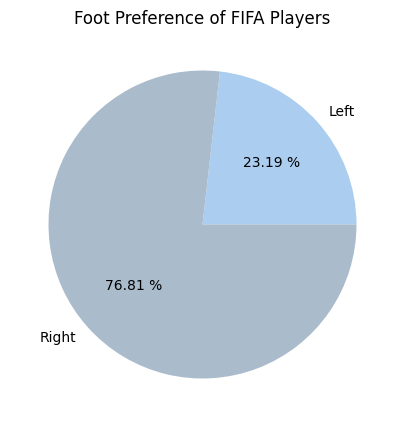

In [8]:
# Load dataset
fifa = pd.read_csv('fifa_data.csv')
# Clean column names
fifa.columns = fifa.columns.str.strip()
# Count players by preferred foot using shape[0] to avoid warning
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].shape[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].shape[0]
# Create pie chart
plt.figure(figsize=(8, 5))
labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']
plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of FIFA Players')
# Show plot
plt.show()

## Pie-Chart 02

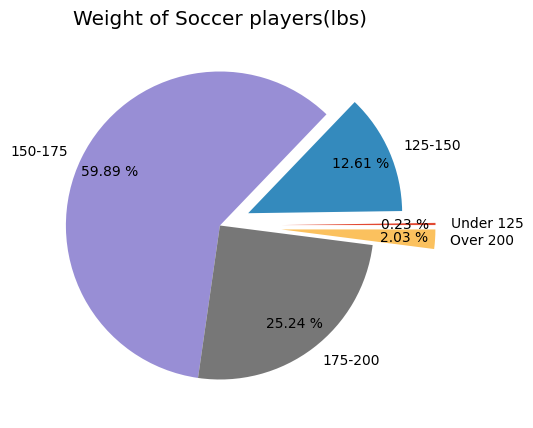

In [12]:
# Load dataset
fifa = pd.read_csv('fifa_data.csv')
# Clean column names
fifa.columns = fifa.columns.str.strip()
# Apply style and figure settings
plt.figure(figsize=(8, 5), dpi=100)
plt.style.use('ggplot')
# Clean and convert 'Weight' column
fifa['Weight'] = fifa['Weight'].apply(lambda x: int(str(x).strip('lbs')) if isinstance(x, str) and 'lbs' in x else pd.to_numeric(x, errors='coerce'))
# Drop NaN values from weight for safety
fifa = fifa.dropna(subset=['Weight'])
# Define weight categories
light = fifa[fifa['Weight'] < 125].shape[0]
light_medium = fifa[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].shape[0]
medium = fifa[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].shape[0]
medium_heavy = fifa[(fifa['Weight'] >= 175) & (fifa['Weight'] < 200)].shape[0]
heavy = fifa[fifa['Weight'] >= 200].shape[0]
# Values for pie chart
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (0.4, 0.2, 0, 0, 0.4)
# Plot pie chart
plt.pie(weights, labels=labels, explode=explode, pctdistance=0.8, autopct='%.2f %%')
plt.title('Weight of Soccer players(lbs)')
plt.show()

## Boxplot

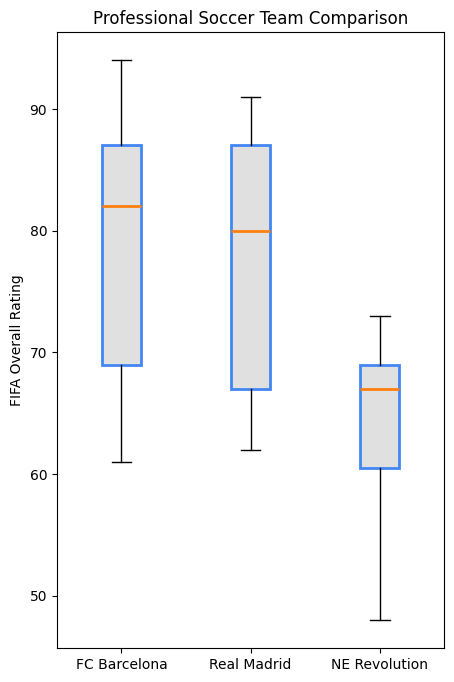

In [10]:
# Load dataset
fifa = pd.read_csv('fifa_data.csv')
# Clean column names
fifa.columns = fifa.columns.str.strip()
# Set up figure and style
plt.figure(figsize=(5, 8), dpi=100)
plt.style.use('default')
# Filter player ratings by club
barcelona = fifa.loc[fifa['Club'] == "FC Barcelona", 'Overall']
madrid = fifa.loc[fifa['Club'] == "Real Madrid", 'Overall']
revs = fifa.loc[fifa['Club'] == "New England Revolution", 'Overall']
# Create boxplot with tick_labels instead of labels
bp = plt.boxplot(
    [barcelona, madrid, revs],
    tick_labels=['FC Barcelona', 'Real Madrid', 'NE Revolution'],
    patch_artist=True,
    medianprops={'linewidth': 2}
)
# Customize boxplot appearance
for box in bp['boxes']:
    box.set(color='#4286f4', linewidth=2)
    box.set(facecolor='#e0e0e0')
# Add title and labels
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
# Show plot
plt.show()


## For Practice

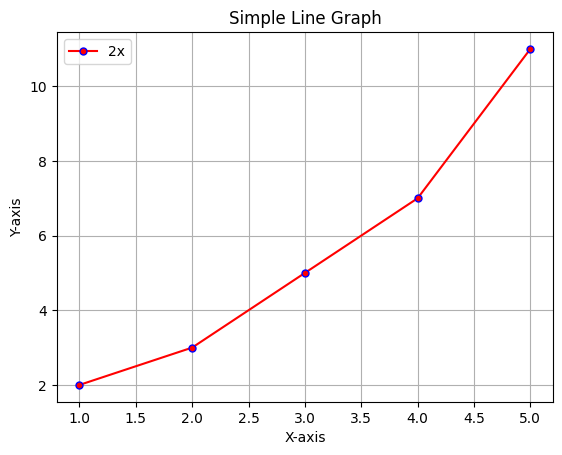

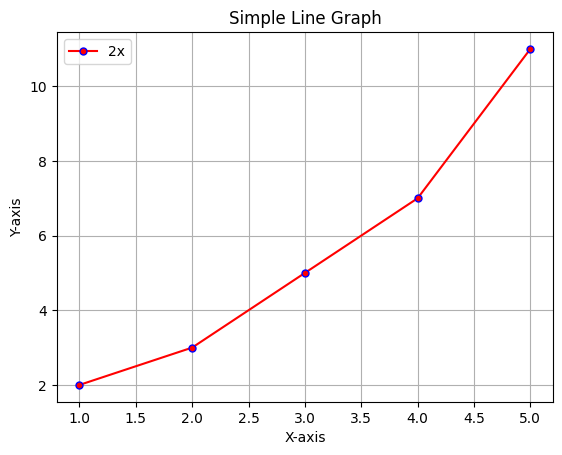

In [11]:
#Figure 1
plt.figure()  #Start a new, separate graph from this point onward
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.plot(x, y, label='2x', color='red', marker='.', markersize=10, markeredgecolor='blue')
plt.title("Simple Line Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

#Figure 2
plt.figure()
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.plot(x, y, label='2x', color='red', marker='.', markersize=10, markeredgecolor='blue')
plt.title("Simple Line Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
#Shows both the figures
plt.show()